<a href="https://colab.research.google.com/github/Cristian1308/Project-Machine-Learning/blob/main/Analisis_exploratorio_con_Regresi%C3%B3n_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan librerías para análisis de datos, visualización y modelado con regresión logística.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Se carga el dataset desde Google Drive.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Exploratorio/card_transdata.csv")

Se definen las variables predictoras (X) y la variable objetivo (y).

In [3]:
X = df.drop("fraud", axis=1)
y = df["fraud"]

Se normalizan las variables para que tengan media 0 y desviación estándar 1.

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Se entrena un modelo de regresión logística con un límite de 1000 iteraciones.

In [5]:
modelo_log = LogisticRegression(max_iter=1000, random_state=42)
modelo_log.fit(X_scaled, y)

LogisticRegression(max_iter=1000, random_state=42)

Se extraen los coeficientes del modelo para cada variable.

In [6]:
coefs = modelo_log.coef_[0]
nombres = X.columns

Se crea un DataFrame con los coeficientes ordenados de mayor a menor.

In [7]:
importancias_log = pd.DataFrame({
    "Variable": nombres,
    "Coeficiente": coefs
}).sort_values(by="Coeficiente", ascending=False)

Se grafica la importancia de cada variable según su coeficiente.

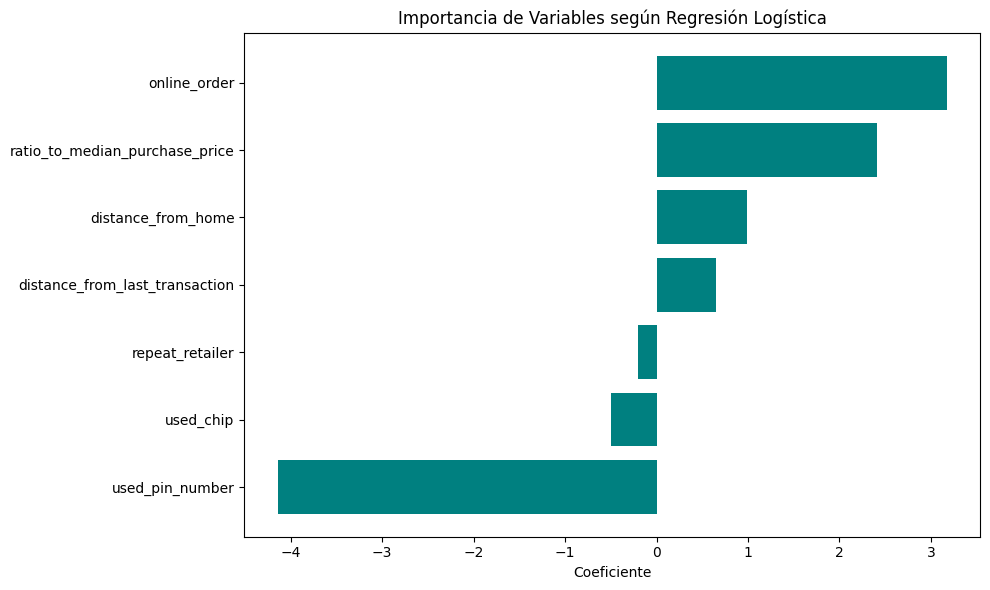

In [8]:
plt.figure(figsize=(10, 6))
plt.barh(importancias_log["Variable"], importancias_log["Coeficiente"], color="teal")
plt.xlabel("Coeficiente")
plt.title("Importancia de Variables según Regresión Logística")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Se imprime la tabla ordenada con los coeficientes.

In [9]:
print(importancias_log)

                         Variable  Coeficiente
6                    online_order     3.170853
2  ratio_to_median_purchase_price     2.413917
0              distance_from_home     0.994089
1  distance_from_last_transaction     0.653134
3                 repeat_retailer    -0.200391
4                       used_chip    -0.501522
5                 used_pin_number    -4.139225
